In [3]:
import numpy as np

In [4]:
a = np.array([[1,2,3],[4,5,6]])

In [5]:
print a

[[1 2 3]
 [4 5 6]]


In [6]:
print "row 1:",a[0,:]
print "row 2:",a[1,:]
print "col 1:",a[:,0]
print "col 2:",a[:,1]

row 1: [1 2 3]
row 2: [4 5 6]
col 1: [1 4]
col 2: [2 5]


In [8]:
y = np.random.uniform(size=10)
y

array([ 0.15947465,  0.99440134,  0.4767618 ,  0.02441085,  0.68022213,
        0.92652572,  0.15446463,  0.77306938,  0.85151861,  0.18458371])

In [9]:
y = np.random.uniform(5,6,size=10)

In [10]:
y

array([ 5.89331905,  5.79742283,  5.66831005,  5.74289782,  5.13103632,
        5.35470028,  5.26684622,  5.41420194,  5.9891941 ,  5.8199676 ])

In [26]:
import matplotlib.pyplot as plt

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


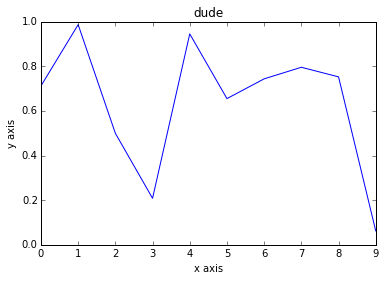

In [28]:
x = np.arange(10)
y = np.random.uniform(size=10)
plt.plot(x,y)
plt.title("dude")
plt.xlabel("x axis")
plt.ylabel("y axis")

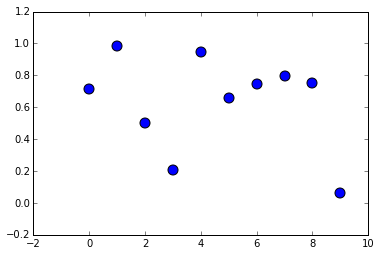

In [29]:
plt.scatter(x,y,s=100)

In [30]:
import pandas as pd

In [41]:
cheese = pd.DataFrame({'type' : ['American', 'Italian','Muenster','brick','Mozzerella'],
                    'prod' : [794538,1348636,50108,3054,898721],
                    'percent' : [18.8, 29.5, 34.2, 26.7, 25.2],
                    'rank' : [1,2,1,2,2]})
cheese['product'] = 'cheese'
cheese = cheese.reindex(columns = ['product','type','prod','percent','rank'])
print cheese.head()

  product        type     prod  percent  rank
0  cheese    American   794538     18.8     1
1  cheese     Italian  1348636     29.5     2
2  cheese    Muenster    50108     34.2     1
3  cheese       brick     3054     26.7     2
4  cheese  Mozzerella   898721     25.2     2


In [42]:
cheese_stack = pd.melt(cheese, id_vars = ['product','type','rank'])
print cheese_stack

  product        type  rank variable      value
0  cheese    American     1     prod   794538.0
1  cheese     Italian     2     prod  1348636.0
2  cheese    Muenster     1     prod    50108.0
3  cheese       brick     2     prod     3054.0
4  cheese  Mozzerella     2     prod   898721.0
5  cheese    American     1  percent       18.8
6  cheese     Italian     2  percent       29.5
7  cheese    Muenster     1  percent       34.2
8  cheese       brick     2  percent       26.7
9  cheese  Mozzerella     2  percent       25.2


In [43]:
cheese_stack = pd.melt(cheese,id_vars = ['product','type'])
print cheese_stack

   product        type variable      value
0   cheese    American     prod   794538.0
1   cheese     Italian     prod  1348636.0
2   cheese    Muenster     prod    50108.0
3   cheese       brick     prod     3054.0
4   cheese  Mozzerella     prod   898721.0
5   cheese    American  percent       18.8
6   cheese     Italian  percent       29.5
7   cheese    Muenster  percent       34.2
8   cheese       brick  percent       26.7
9   cheese  Mozzerella  percent       25.2
10  cheese    American     rank        1.0
11  cheese     Italian     rank        2.0
12  cheese    Muenster     rank        1.0
13  cheese       brick     rank        2.0
14  cheese  Mozzerella     rank        2.0


In [44]:
cheese = cheese.set_index(['product','type'])
print cheese.head()

                       prod  percent  rank
product type                              
cheese  American     794538     18.8     1
        Italian     1348636     29.5     2
        Muenster      50108     34.2     1
        brick          3054     26.7     2
        Mozzerella   898721     25.2     2


In [47]:
for x in cheese_stack.index.values:
    print x

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [48]:
Cov = np.array([[2.9,-2.2],[-2.2,6.5]])
X = np.random.multivariate_normal([1,2],Cov,size = 200)

In [49]:
np.set_printoptions(4,suppress=True)
print X[:10,:]

[[ 0.9861  1.3422]
 [ 2.5828  2.6455]
 [ 1.5223  4.66  ]
 [ 2.4224  0.2593]
 [ 2.8677 -2.6311]
 [-2.0752  2.0769]
 [ 2.0327 -0.8257]
 [ 2.8668 -0.9852]
 [ 0.7769  2.6332]
 [ 1.0555  2.3563]]


(-6.0, 8.0, -6.0, 10.0)

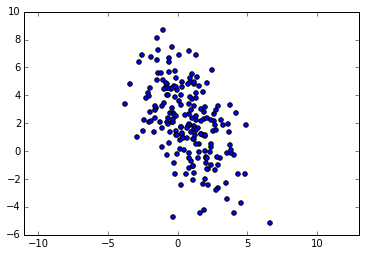

In [51]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

In [55]:
print np.cov(X,rowvar=False)

[[ 3.1704 -2.4229]
 [-2.4229  7.219 ]]


In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA()
X_pca = pca.fit_transform(X)
pca.components_

array([[ 0.4236, -0.9059],
       [ 0.9059,  0.4236]])

In [58]:
pca.mean_

array([ 0.7517,  2.0418])

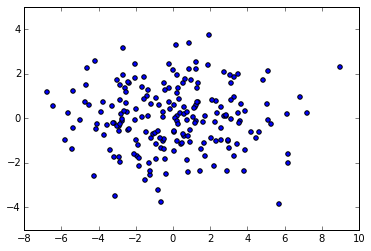

In [59]:
plt.scatter(X_pca[:,0],X_pca[:,1])

In [60]:
print np.cov(X_pca, rowvar = False)

[[ 8.3519  0.    ]
 [ 0.      2.0374]]


In [61]:
np.random.seed(1)
X_HD = np.dot(X,np.random.uniform(0.2,3,(2,4))*(np.random.randint(0,2,(2,4))*2-1))

In [64]:
print X_HD[:10]

[[-2.1686  2.8015 -1.166  -2.5991]
 [-5.1486  6.9389 -2.4262 -5.7918]
 [-4.9288  5.5116 -3.6672 -7.034 ]
 [-3.4714  5.4891 -0.6724 -2.8379]
 [-2.3147  5.151   1.324   0.0709]
 [ 1.5693 -3.6481 -1.0828 -0.2532]
 [-2.2756  4.1276  0.1886 -1.1632]
 [-3.319   5.9037  0.1366 -1.8499]
 [-2.6713  2.9299 -2.0556 -3.8876]
 [-2.8831  3.4205 -1.9116 -3.8558]]


In [65]:
x_he = pca.fit_transform(X_HD)

In [66]:
print x_he[:10]

[[-0.2457  0.7258 -0.     -0.    ]
 [ 5.877   0.1845  0.      0.    ]
 [ 5.5104 -2.0592  0.      0.    ]
 [ 2.3646  2.2773  0.      0.    ]
 [-0.1079  5.0675  0.      0.    ]
 [-7.8303 -1.1591  0.     -0.    ]
 [-0.1149  3.1026  0.     -0.    ]
 [ 2.0041  3.5795  0.     -0.    ]
 [ 0.8302 -0.5245  0.     -0.    ]
 [ 1.2507 -0.1631  0.      0.    ]]
